In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Model Fitting

Consider the setting where we are given a dataset, and we are interested in fitting a parametrized model to the data. When we talk about “fitting”, we typically mean optimizing/learning model parameters so that they minimize some loss function, e.g., the negative log-likelihood. With maximum likelihood (Section 8.3.1) and maximum a posteriori estimation (Section 8.3.2), we already discussed two commonly used algorithms for model fitting.

The parametrization of the model defines a model class $\mathcal{M}_\theta$ with which we can operate. For example, in a linear regression setting, we may define the relationship between inputs $x$ and (noise-free) observations $y$ to be $y = ax + b$, where $\theta := \{a, b\}$ are the model parameters. In this case, the model parameters $\theta$ describe the family of affine functions, i.e., straight lines with slope $a$, which are offset from 0 by $b$.

Assume the data comes from a model $\mathcal{M}^*$, which is unknown to us. For a given training dataset, we optimize $\theta$ so that $\mathcal{M}_\theta$ is as close as possible to $\mathcal{M}^*$, where the “closeness” is defined by the objective function we optimize (e.g., squared loss on the training data). Figure 8.7 illustrates a setting where we have a small model class (indicated by the circle $\mathcal{M}_\theta$), and the data generation model $\mathcal{M}^*$ lies outside the set of considered models. We begin our parameter search at $\mathcal{M}_{\theta_0}$. After the optimization, i.e., when we obtain the best possible parameters $\theta^*$, we distinguish three different cases: (i) *overfitting*, (ii) *underfitting*, and (iii) *fitting well*. We will give a high-level intuition of what these three concepts mean.

Roughly speaking, *overfitting* refers to the situation where the parametrized model class is too rich to model the dataset generated by $\mathcal{M}^*$, i.e., $\mathcal{M}_\theta$ could model much more complicated datasets. For instance, if the dataset was generated by a linear function, and we define $\mathcal{M}_\theta$ to be the class of seventh-order polynomials, we could model not only linear functions, but also polynomials of degree two, three, etc. Models that overfit typically have a large number of parameters. An observation we often make is that the overly flexible model class $\mathcal{M}_\theta$ uses all its modeling power to reduce the training error. If the training data is noisy, it will therefore find some useful signal in the noise itself. This will cause enormous problems when we predict away from the training data. Figure 8.8(a) gives an example of overfitting in the context of regression where the model parameters are learned by means of maximum likelihood (see Section 8.3.1). We will discuss overfitting in regression more in Section 9.2.2.

> **Note**: One way to detect overfitting in practice is to observe that the model has low training risk but high test risk during cross-validation (Section 8.2.4).

When we run into *underfitting*, we encounter the opposite problem where the model class $\mathcal{M}_\theta$ is not rich enough. For example, if our dataset was generated by a sinusoidal function, but $\theta$ only parametrizes straight lines, the best optimization procedure will not get us close to the true model. However, we still optimize the parameters and find the best straight line that models the dataset. Figure 8.8(b) shows an example of a model that underfits because it is insufficiently flexible. Models that underfit typically have few parameters.

The third case is when the parametrized model class is about right. Then, our model *fits well*, i.e., it neither overfits nor underfits. This means our model class is just rich enough to describe the dataset we are given. Figure 8.8(c) shows a model that fits the given dataset fairly well. Ideally, this is the model class we would want to work with since it has good generalization properties.

In practice, we often define very rich model classes $\mathcal{M}_\theta$ with many parameters, such as deep neural networks. To mitigate the problem of overfitting, we can use regularization (Section 8.2.3) or priors (Section 8.3.2). We will discuss how to choose the model class in Section 8.6.

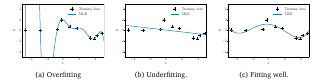

## Fig.8: Fitting (by Maximum Likelihood) of Different Model Classes to a Regression Dataset

| (a) Overfitting | (b) Underfitting | (c) Fitting Well |
|-----------------|------------------|------------------|
| ![Overfitting](overfitting.png) | ![Underfitting](underfitting.png) | ![Fitting Well](fitting_well.png) |

- **(a) Overfitting**: The model is too complex (e.g., a high-degree polynomial), capturing noise in the training data.
- **(b) Underfitting**: The model is too simple (e.g., a straight line for sinusoidal data), failing to capture the underlying pattern.
- **(c) Fitting Well**: The model complexity matches the data, balancing fit and generalization.

Model Fitting Demonstration with Matplotlib Plotting
=== Model Fitting Demonstration ===
Section 8.3.3: Model Fitting

Fitting Overfitting Model (4th-Degree Polynomial)
Overfitting parameters: theta = [-0.8518814176628524, 1.216179801946339, 8.741120981011136, 2.8960495421810606, -4.439521306708286]

Fitting Underfitting Model (Constant Model)
Underfitting parameters: theta = [-2.886579864025407e-16]

Fitting Well Model (Linear Model)
Fitting Well parameters: theta = [-3.0580211088545576e-16, 0.7721027263284954]

Computing Risks on Training and Test Data
Overfitting - Training Risk: 0.0000, Test Risk: 33.3629
Underfitting - Training Risk: 1.0000, Test Risk: 0.7295
Fitting Well - Training Risk: 0.4039, Test Risk: 0.0678

Prediction on New Data (Using Fitting Well Model)
Prediction at x = 60: y = 136.155 thousand

Plotting Training Data, Test Data, and Fitted Models


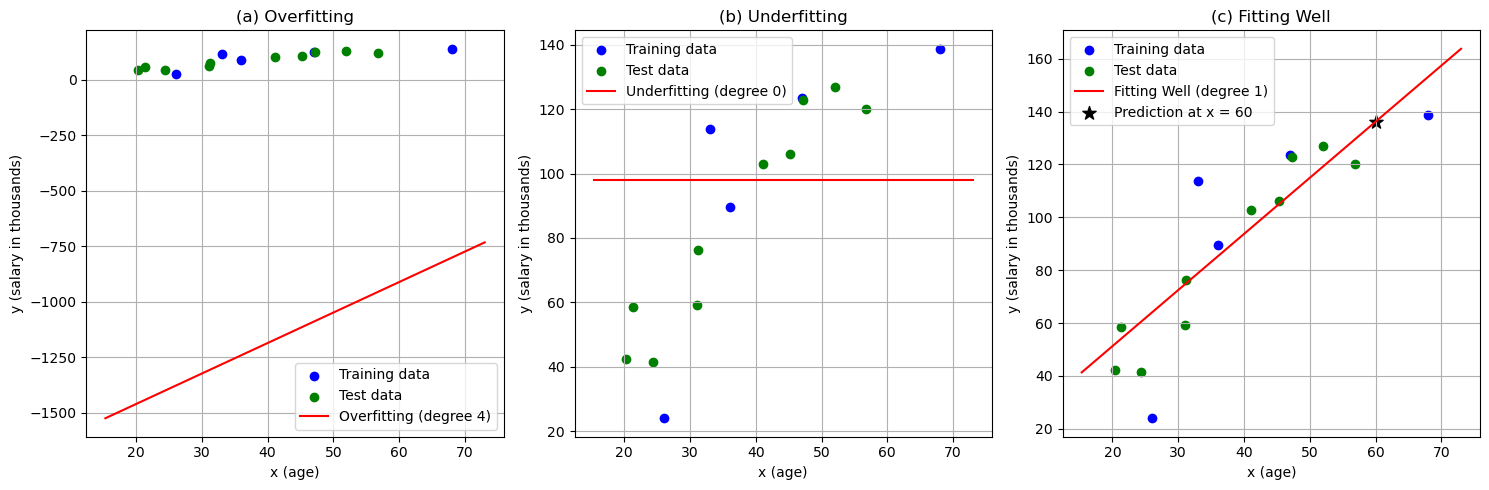


Summary of Results and Visualizations:
• Overfitting parameters (degree 4): theta = [-0.8518814176628524, 1.216179801946339, 8.741120981011136, 2.8960495421810606, -4.439521306708286]
• Underfitting parameters (degree 0): theta = [-2.886579864025407e-16]
• Fitting Well parameters (degree 1): theta = [-3.0580211088545576e-16, 0.7721027263284954]
• Predicted salary at age 60: 136.155 thousand
• Plotted training data, test data, and fitted models


In [1]:
import math
import matplotlib.pyplot as plt
import random

# Set random seed for reproducibility
random.seed(42)

# --- Data from Table 8.2 ---
# Age (x_n) and Annual Salary (y_n in thousands)
data = [
    (36, 89.563),  # Aditya
    (47, 123.543),  # Bob
    (26, 23.989),  # Chloé
    (68, 138.769),  # Daisuke
    (33, 113.888),  # Elisabeth
]

# --- Generate Synthetic Test Data ---
# Assume true model is linear: y = a*x + b + noise, with a and b approximated from data
def generate_test_data(x_range, n_points, a_true, b_true, noise_std):
    """Generate synthetic test data based on a linear model with noise."""
    test_data = []
    for _ in range(n_points):
        x = random.uniform(x_range[0], x_range[1])
        noise = random.gauss(0, noise_std)
        y = a_true * x + b_true + noise
        test_data.append((x, y))
    return test_data

# Approximate true linear model parameters from training data
x_mean = sum(x for x, y in data) / len(data)
y_mean = sum(y for x, y in data) / len(data)
a_true = sum((x - x_mean) * (y - y_mean) for x, y in data) / sum((x - x_mean) ** 2 for x, y in data)
b_true = y_mean - a_true * x_mean
noise_std = 10.0  # Assumed noise standard deviation
test_data = generate_test_data(x_range=(20, 70), n_points=10, a_true=a_true, b_true=b_true, noise_std=noise_std)

# Extract training and test data
x_train = [x for x, y in data]
y_train = [y for x, y in data]
x_test = [x for x, y in test_data]
y_test = [y for x, y in test_data]

# --- Data Preprocessing ---
def standardize(data_list):
    """Standardize a list to have mean 0 and variance 1."""
    n = len(data_list)
    mean = sum(data_list) / n
    variance = sum((x - mean) ** 2 for x in data_list) / n
    std_dev = math.sqrt(variance) if variance > 0 else 1
    return [(x - mean) / std_dev for x in data_list], mean, std_dev

# Standardize training data
x_train_std, x_train_mean, x_train_std_dev = standardize(x_train)
y_train_std, y_train_mean, y_train_std_dev = standardize(y_train)

# Standardize test data using training statistics
x_test_std = [(x - x_train_mean) / x_train_std_dev for x in x_test]
y_test_std = [(y - y_train_mean) / y_train_std_dev for y in y_test]

# --- Matrix Operations ---
def dot_product(v1, v2):
    """Compute dot product of two vectors."""
    return sum(a * b for a, b in zip(v1, v2))

def matrix_multiply(A, B):
    """Multiply two matrices A (m x n) and B (n x p)."""
    m, n = len(A), len(A[0])
    n_b, p = len(B), len(B[0])
    result = [[0 for _ in range(p)] for _ in range(m)]
    for i in range(m):
        for j in range(p):
            for k in range(n):
                result[i][j] += A[i][k] * B[k][j]
    return result

def transpose_matrix(A):
    """Transpose a matrix."""
    m, n = len(A), len(A[0])
    return [[A[i][j] for i in range(m)] for j in range(n)]

def inverse_matrix(A):
    """Compute the inverse of a square matrix using Gaussian elimination."""
    n = len(A)
    # Create augmented matrix [A | I]
    aug = [[A[i][j] if j < n else 1 if i == j - n else 0 for j in range(2 * n)] for i in range(n)]
    
    # Gaussian elimination
    for i in range(n):
        # Pivot
        pivot = aug[i][i]
        if abs(pivot) < 1e-10:
            raise ValueError("Matrix is singular")
        for j in range(2 * n):
            aug[i][j] /= pivot
        # Eliminate column
        for k in range(n):
            if k != i:
                factor = aug[k][i]
                for j in range(2 * n):
                    aug[k][j] -= factor * aug[i][j]
    
    # Extract inverse
    return [[aug[i][j] for j in range(n, 2 * n)] for i in range(n)]

# --- Model Fitting (Least Squares) ---
def create_design_matrix(x, degree):
    """Create design matrix for polynomial regression of given degree."""
    return [[x_i ** d for d in range(degree + 1)] for x_i in x]

def fit_least_squares(X, y):
    """
    Fit a model using least squares: min ||y - X theta||^2.
    Solves (X^T X) theta = X^T y.
    Returns theta.
    """
    X_T = transpose_matrix(X)
    XTX = matrix_multiply(X_T, X)
    XTy = matrix_multiply(X_T, [[yi] for yi in y])
    XTy = [row[0] for row in XTy]
    
    # Solve (X^T X) theta = X^T y
    XTX_inv = inverse_matrix(XTX)
    theta = matrix_multiply(XTX_inv, [[XTy[i]] for i in range(len(XTy))])
    theta = [row[0] for row in theta]
    
    return theta

def predict_polynomial(x, theta, x_mean, x_std_dev, y_mean, y_std_dev, degree):
    """Predict y for a given x using a polynomial model, unstandardizing the result."""
    x_std = (x - x_mean) / x_std_dev
    x_powers = [x_std ** d for d in range(degree + 1)]
    y_std = dot_product(theta, x_powers)
    y = y_std * y_std_dev + y_mean
    return y

# --- Compute Empirical Risk ---
def compute_empirical_risk(X, y, theta):
    """Compute the empirical risk (mean squared loss)."""
    N = len(y)
    predictions = [dot_product(theta, xi) for xi in X]
    return sum((yi - pred) ** 2 for yi, pred in zip(y, predictions)) / N

# --- Main Demonstration ---
def demonstrate_model_fitting():
    """Demonstrate overfitting, underfitting, and fitting well."""
    print("=== Model Fitting Demonstration ===")
    print("Section 8.3.3: Model Fitting\n")

    # Step 1: Fit models of different complexities
    # Overfitting: 4th-degree polynomial
    print("Fitting Overfitting Model (4th-Degree Polynomial)")
    degree_overfit = 4
    X_overfit = create_design_matrix(x_train_std, degree_overfit)
    theta_overfit = fit_least_squares(X_overfit, y_train_std)
    print(f"Overfitting parameters: theta = {theta_overfit}\n")
    
    # Underfitting: Constant model (degree 0)
    print("Fitting Underfitting Model (Constant Model)")
    degree_underfit = 0
    X_underfit = create_design_matrix(x_train_std, degree_underfit)
    theta_underfit = fit_least_squares(X_underfit, y_train_std)
    print(f"Underfitting parameters: theta = {theta_underfit}\n")
    
    # Fitting well: Linear model (degree 1)
    print("Fitting Well Model (Linear Model)")
    degree_fit = 1
    X_fit = create_design_matrix(x_train_std, degree_fit)
    theta_fit = fit_least_squares(X_fit, y_train_std)
    print(f"Fitting Well parameters: theta = {theta_fit}\n")
    
    # Step 2: Compute risks on training and test data
    print("Computing Risks on Training and Test Data")
    # Training risks
    train_risk_overfit = compute_empirical_risk(X_overfit, y_train_std, theta_overfit)
    train_risk_underfit = compute_empirical_risk(X_underfit, y_train_std, theta_underfit)
    train_risk_fit = compute_empirical_risk(X_fit, y_train_std, theta_fit)
    
    # Test risks
    X_test_overfit = create_design_matrix(x_test_std, degree_overfit)
    X_test_underfit = create_design_matrix(x_test_std, degree_underfit)
    X_test_fit = create_design_matrix(x_test_std, degree_fit)
    test_risk_overfit = compute_empirical_risk(X_test_overfit, y_test_std, theta_overfit)
    test_risk_underfit = compute_empirical_risk(X_test_underfit, y_test_std, theta_underfit)
    test_risk_fit = compute_empirical_risk(X_test_fit, y_test_std, theta_fit)
    
    print(f"Overfitting - Training Risk: {train_risk_overfit:.4f}, Test Risk: {test_risk_overfit:.4f}")
    print(f"Underfitting - Training Risk: {train_risk_underfit:.4f}, Test Risk: {test_risk_underfit:.4f}")
    print(f"Fitting Well - Training Risk: {train_risk_fit:.4f}, Test Risk: {test_risk_fit:.4f}\n")
    
    # Step 3: Predict on new data using the "fitting well" model
    print("Prediction on New Data (Using Fitting Well Model)")
    x_query = 60
    y_pred = predict_polynomial(x_query, theta_fit, x_train_mean, x_train_std_dev, y_train_mean, y_train_std_dev, degree_fit)
    print(f"Prediction at x = {x_query}: y = {y_pred:.3f} thousand\n")
    
    return theta_overfit, theta_underfit, theta_fit, degree_overfit, degree_underfit, degree_fit, x_query, y_pred

# --- Plotting Function ---
def plot_results(theta_overfit, theta_underfit, theta_fit, degree_overfit, degree_underfit, degree_fit, x_query, y_pred):
    """Plot the training data, test data, and fitted models using Matplotlib."""
    plt.figure(figsize=(15, 5))
    
    # (a) Overfitting
    plt.subplot(1, 3, 1)
    plt.scatter(x_train, y_train, color="blue", label="Training data")
    plt.scatter(x_test, y_test, color="green", label="Test data")
    x_range = [min(x_train + x_test) - 5, max(x_train + x_test) + 5]
    x_range_std = [(x - x_train_mean) / x_train_std_dev for x in x_range]
    y_range_overfit = [predict_polynomial(x, theta_overfit, x_train_mean, x_train_std_dev, y_train_mean, y_train_std_dev, degree_overfit) for x in x_range]
    plt.plot(x_range, y_range_overfit, color="red", label="Overfitting (degree 4)")
    plt.title("(a) Overfitting")
    plt.xlabel("x (age)")
    plt.ylabel("y (salary in thousands)")
    plt.legend()
    plt.grid(True)
    
    # (b) Underfitting
    plt.subplot(1, 3, 2)
    plt.scatter(x_train, y_train, color="blue", label="Training data")
    plt.scatter(x_test, y_test, color="green", label="Test data")
    y_range_underfit = [predict_polynomial(x, theta_underfit, x_train_mean, x_train_std_dev, y_train_mean, y_train_std_dev, degree_underfit) for x in x_range]
    plt.plot(x_range, y_range_underfit, color="red", label="Underfitting (degree 0)")
    plt.title("(b) Underfitting")
    plt.xlabel("x (age)")
    plt.ylabel("y (salary in thousands)")
    plt.legend()
    plt.grid(True)
    
    # (c) Fitting Well
    plt.subplot(1, 3, 3)
    plt.scatter(x_train, y_train, color="blue", label="Training data")
    plt.scatter(x_test, y_test, color="green", label="Test data")
    y_range_fit = [predict_polynomial(x, theta_fit, x_train_mean, x_train_std_dev, y_train_mean, y_train_std_dev, degree_fit) for x in x_range]
    plt.plot(x_range, y_range_fit, color="red", label="Fitting Well (degree 1)")
    plt.scatter([x_query], [y_pred], color="black", s=100, marker="*", label=f"Prediction at x = {x_query}")
    plt.title("(c) Fitting Well")
    plt.xlabel("x (age)")
    plt.ylabel("y (salary in thousands)")
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# --- Main Execution ---
if __name__ == "__main__":
    print("Model Fitting Demonstration with Matplotlib Plotting")
    print("=" * 60)

    # Demonstrate model fitting
    theta_overfit, theta_underfit, theta_fit, degree_overfit, degree_underfit, degree_fit, x_query, y_pred = demonstrate_model_fitting()

    # Plot the results
    print("Plotting Training Data, Test Data, and Fitted Models")
    plot_results(theta_overfit, theta_underfit, theta_fit, degree_overfit, degree_underfit, degree_fit, x_query, y_pred)

    print("\n" + "=" * 60)
    print("Summary of Results and Visualizations:")
    print(f"• Overfitting parameters (degree {degree_overfit}): theta = {theta_overfit}")
    print(f"• Underfitting parameters (degree {degree_underfit}): theta = {theta_underfit}")
    print(f"• Fitting Well parameters (degree {degree_fit}): theta = {theta_fit}")
    print(f"• Predicted salary at age {x_query}: {y_pred:.3f} thousand")
    print("• Plotted training data, test data, and fitted models")

## Probabilistic Modeling and Inference

In machine learning, we are frequently concerned with the interpretation and analysis of data, e.g., for prediction of future events and decision making. To make this task more tractable, we often build models that describe the generative process that generates the observed data. For example, we can describe the outcome of a coin-flip experiment (“heads” or “tails”) in two steps. First, we define a parameter $\mu$, which describes the probability of “heads” as the parameter of a Bernoulli distribution (Chapter 6); second, we can sample an outcome $x \in \{\text{head}, \text{tail}\}$ from the Bernoulli distribution $p(x | \mu) = \text{Ber}(\mu)$. The parameter $\mu$ gives rise to a specific dataset $X$ and depends on the coin used. Since $\mu$ is unknown in advance and can never be observed directly, we need mechanisms to learn something about $\mu$ given observed outcomes of coin-flip experiments. In the following, we will discuss how probabilistic modeling can be used for this purpose.

##  Probabilistic Models

A *probabilistic model* is specified by the joint probability distribution of all random variables. The benefit of using probabilistic models is that they offer a unified and consistent set of tools from probability theory (Chapter 6) for modeling, inference, prediction, and model selection.

In probabilistic modeling, the joint distribution $p(x, \theta)$ of the observed variables $x$ and the hidden parameters $\theta$ is of central importance. It encapsulates information from the following:

- The prior and the likelihood (product rule, Section 6.3).
- The marginal likelihood $p(x)$, which will play an important role in model selection (Section 8.6), can be computed by taking the joint distribution and integrating out the parameters (sum rule, Section 6.3).
- The posterior, which can be obtained by dividing the joint by the marginal likelihood.

Only the joint distribution has this property. Therefore, a probabilistic model is specified by the joint distribution of all its random variables.

##  Bayesian Inference

Parameter estimation can be phrased as an optimization problem. A key task in machine learning is to take a model and the data to uncover the values of the model’s hidden variables $\theta$ given the observed variables $x$. In Section 8.3.1, we already discussed two ways for estimating model parameters $\theta$ using maximum likelihood or maximum a posteriori estimation. In both cases, we obtain a single-best value for $\theta$ so that the key algorithmic problem of parameter estimation is solving an optimization problem. Once these point estimates $\theta^*$ are known, we use them to make predictions. More specifically, the predictive distribution will be $p(x | \theta^*)$, where we use $\theta^*$ in the likelihood function.

As discussed in Section 6.3, focusing solely on some statistic of the posterior distribution (such as the parameter $\theta^*$ that maximizes the posterior) leads to loss of information, which can be critical in a system that uses the prediction $p(x | \theta^*)$ to make decisions.

## 8.4.2 Bayesian Inference (Continued)

These decision-making systems typically have different objective functions than the likelihood, such as a squared-error loss or a misclassification error. Therefore, having the full posterior distribution around can be extremely useful and leads to more robust decisions. Bayesian inference is about finding this posterior distribution (Gelman et al., 2004).

For a dataset $X$, a parameter prior $p(\theta)$, and a likelihood function, the posterior is obtained by applying Bayes’ theorem:

$$
p(\theta | X) = \frac{p(X | \theta) p(\theta)}{p(X)}, \quad p(X) = \int p(X | \theta) p(\theta) \, d\theta, \tag{8.22}
$$

The key idea is to exploit Bayes’ theorem to invert the relationship between the parameters $\theta$ and the data $X$ (given by the likelihood) to obtain the posterior distribution $p(\theta | X)$. The implication of having a posterior distribution on the parameters is that it can be used to propagate uncertainty from the parameters to the data. More specifically, with a distribution $p(\theta)$ on the parameters, our predictions will be:

$$
p(x) = \int p(x | \theta) p(\theta) \, d\theta = \mathbb{E}_{\theta} [p(x | \theta)], \tag{8.23}
$$

and they no longer depend on the model parameters $\theta$, which have been marginalized/integrated out. Equation (8.23) reveals that the prediction is an average over all plausible parameter values $\theta$, where the plausibility is encapsulated by the parameter distribution $p(\theta)$.

Having discussed parameter estimation in Section 8.3 and Bayesian inference here, let us compare these two approaches to learning. Parameter estimation via maximum likelihood or MAP estimation yields a consistent point estimate $\theta^*$ of the parameters, and the key computational problem to be solved is optimization. In contrast, Bayesian inference yields a (posterior) distribution, and the key computational problem to be solved is integration. Predictions with point estimates are straightforward, whereas predictions in the Bayesian framework require solving another integration problem; see (8.23). However, Bayesian inference gives us a principled way to incorporate prior knowledge, account for side information, and incorporate structural knowledge, all of which is not easily done in the context of parameter estimation. Moreover, the propagation of parameter uncertainty to the prediction can be valuable in decision-making systems for risk assessment and exploration in the context of data-efficient learning (Deisenroth et al., 2015; Kamthe and Deisenroth, 2018).

While Bayesian inference is a mathematically principled framework for learning about parameters and making predictions, there are some practical challenges that come with it because of the integration problems we need to solve; see (8.22) and (8.23). More specifically, if we do not choose a conjugate prior on the parameters (Section 6.6.1), the integrals in (8.22) and (8.23) are not analytically tractable, and we cannot compute the posterior, the predictions, or the marginal likelihood in closed form. In these cases, we need to resort to approximations. Here, we can use stochastic approximations, such as Markov Chain Monte Carlo (MCMC) (Gilks et al., 1996), or deterministic approximations, such as the Laplace approximation (Bishop, 2006; Barber, 2012; Murphy, 2012), variational inference (Jordan et al., 1999; Blei et al., 2017), or expectation propagation (Minka, 2001a).

Despite these challenges, Bayesian inference has been successfully applied to a variety of problems, including large-scale topic modeling (Hoffman et al., 2013), click-through-rate prediction (Graepel et al., 2010), data-efficient reinforcement learning in control systems (Deisenroth et al., 2015), online ranking systems (Herbrich et al., 2007), and large-scale recommender systems. There are generic tools, such as Bayesian optimization (Brochu et al., 2009; Snoek et al., 2012; Shahriari et al., 2016), that are very useful ingredients for an efficient search of meta parameters of models or algorithms.

> **Remark**: In the machine learning literature, there can be a somewhat arbitrary separation between (random) “variables” and “parameters”. While parameters are estimated (e.g., via maximum likelihood), variables are usually marginalized out. In this book, we are not so strict with this separation because, in principle, we can place a prior on any parameter and integrate it out, which would then turn the parameter into a random variable according to the aforementioned separation. $\diamond$

Generated Data: 10 flips, 6 data: 10, 6 heads, 4 tails
Bayesian Inference Demonstration with Matplotlib Plotting
=== Bayesian Inference Demonstration ===
Section 8.4: Probabilistic Modeling and Inference

Prior: Beta(2, 2)
Posterior: Beta(8, 6)
MDLE for mu: 0.600

Predictive Probability P(x_new = heads | X): 0.571

Plotting Prior, Likelihood of Prior, and Posterior


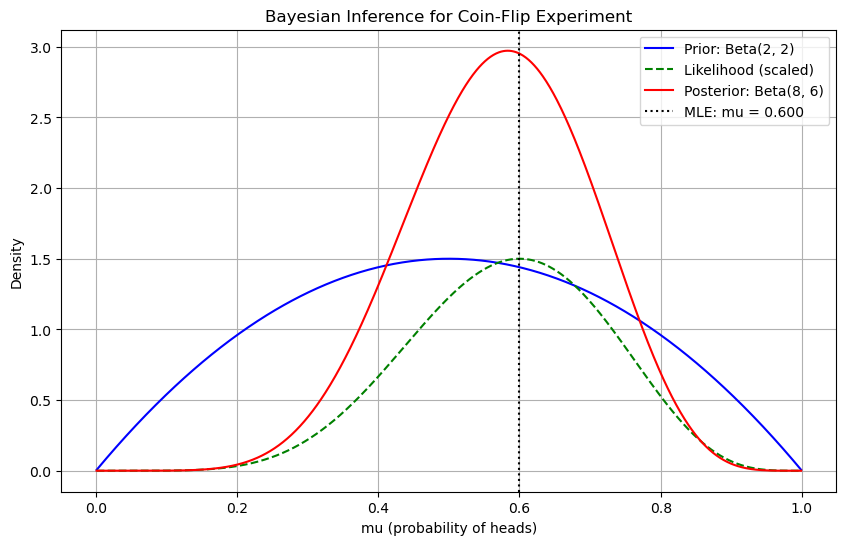


Summary of Results and Visualizations:
• Prior: Beta(2, 2)
• Posterior: Beta(8, 6)
• MLE for mu: 0.600
• Predictive probability P(x_new = heads | X): 0.571
• Plotted prior, likelihood (scaled), posterior, and MLE


In [3]:
import math
import matplotlib.pyplot as plt
import random

# Set random seed for reproducibility
random.seed(42)

# --- Beta Distribution Functions ---
def beta_pdf(mu, alpha, beta):
    """Compute the PDF of a Beta distribution at mu."""
    if mu <= 0 or mu >= 1:  # Handle boundaries
        return 0
    # Beta(mu | alpha, beta) = mu^(alpha-1) * (1-mu)^(beta-1) / B(alpha, beta)
    # B(alpha, beta) = Gamma(alpha) * Gamma(beta) / Gamma(alpha + beta)
    # Use log for numerical stability
    try:
        log_numerator = (alpha - 1) * math.log(mu) + (beta - 1) * math.log(1 - mu)
        log_denominator = math.lgamma(alpha) + math.lgamma(beta) - math.lgamma(alpha + beta)
        return math.exp(log_numerator - log_denominator)
    except (ValueError, OverflowError):
        return 0  # Return 0 if numerical issues arise

def beta_mean(alpha, beta):
    """Compute the mean of a Beta distribution."""
    return alpha / (alpha + beta)

# --- Generate Synthetic Coin-Flip Data ---
def generate_coin_flips(n_flips, true_mu):
    """Generate synthetic coin-flip data (1 for heads, 0 for tails)."""
    data = []
    for _ in range(n_flips):
        # Simulate a Bernoulli trial
        x = 1 if random.random() < true_mu else 0
        data.append(x)
    return data

# Generate data: 10 flips with true mu = 0.6
n_flips = 10
true_mu = 0.6
data = generate_coin_flips(n_flips, true_mu)
n_heads = sum(data)
n_tails = n_flips - n_heads
print(f"Generated Data: {n_flips} flips, {n_heads} data: {n_flips}, {n_heads} heads, {n_tails} tails")

# --- Bayesian Inference ---
def compute_posterior(alpha_prior, beta_prior, n_heads, n_tails):
    """Compute the posterior distribution p(mu | X) using a Beta prior."""
    # Posterior: Beta(mu | alpha_prior + n_heads, beta_prior + n_tails)
    alpha_post = alpha_prior + n_heads
    beta_post = beta_prior + n_tails
    return alpha_post, beta_post

def compute_likelihood(mu, n_heads, n_tails):
    """Compute the likelihood p(X | mu) for visualization."""
    if mu <= 0 or mu >= 1:
        return 0
    return mu ** n_heads * (1 - mu) ** n_tails

def compute_mle(n_heads, n_tails):
    """Compute the MLE for mu."""
    total = n_heads + n_tails
    return n_heads / total if total > 0 else 0.5

def compute_predictive_probability(alpha_post, beta_post):
    """Compute the predictive probability p(x_new = 1 | X) by marginalizing mu."""
    return beta_mean(alpha_post, beta_post)

# --- Main Demonstration ---
def demonstrate_bayesian_inference():
    """Demonstrate Bayesian inference for the coin-flip example."""
    print("=== Bayesian Inference Demonstration ===")
    print("Section 8.4: Probabilistic Modeling and Inference\n")

    # Step 1: Define prior
    alpha_prior = 2
    beta_prior = 2  # Beta(2, 2) prior (somewhat uniform-like)
    print(f"Prior: Beta({alpha_prior}, {beta_prior})")

    # Step 2: Compute posterior
    alpha_post, beta_post = compute_posterior(alpha_prior, beta_prior, n_heads, n_tails)
    print(f"Posterior: Beta({alpha_post}, {beta_post})")

    # Step 3: Compute MLE
    mu_mle = compute_mle(n_heads, n_tails)
    print(f"MDLE for mu: {mu_mle:.3f}\n")

    # Step 4: Compute predictive probability
    p_new_head = compute_predictive_probability(alpha_post, beta_post)
    print(f"Predictive Probability P(x_new = heads | X): {p_new_head:.3f}\n")

    return alpha_prior, beta_prior, alpha_post, beta_post, mu_mle, p_new_head

# --- Plotting Function ---
def plot_distributions(alpha_prior, beta_prior, alpha_post, beta_post, mu_mle):
    """Plot the prior, likelihood, and posterior distributions using Matplotlib."""
    # Avoid exact boundaries (0 and 1) to prevent log(0)
    mu_values = [i / 1000 for i in range(1, 1000)]  # From 0.001 to 0.999

    # Compute PDF values
    prior = [beta_pdf(mu, alpha_prior, beta_prior) for mu in mu_values]
    posterior = [beta_pdf(mu, alpha_post, beta_post) for mu in mu_values]
    likelihood = [compute_likelihood(mu, n_heads, n_tails) for mu in mu_values]
    
    # Scale likelihood for visualization
    likelihood_max = max(likelihood)
    prior_max = max(prior)
    scale = prior_max / likelihood_max if likelihood_max > 0 else 1
    likelihood = [l * scale for l in likelihood]

    plt.figure(figsize=(10, 6))
    plt.plot(mu_values, prior, label=f"Prior: Beta({alpha_prior}, {beta_prior})", color="blue")
    plt.plot(mu_values, likelihood, label="Likelihood (scaled)", color="green", linestyle="--")
    plt.plot(mu_values, posterior, label=f"Posterior: Beta({alpha_post}, {beta_post})", color="red")
    plt.axvline(mu_mle, color="black", linestyle=":", label=f"MLE: mu = {mu_mle:.3f}")
    plt.title("Bayesian Inference for Coin-Flip Experiment")
    plt.xlabel("mu (probability of heads)")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)

    plt.show()

# --- Main Execution ---
if __name__ == "__main__":
    print("Bayesian Inference Demonstration with Matplotlib Plotting")
    print("=" * 60)

    # Demonstrate Bayesian inference
    alpha_prior, beta_prior, alpha_post, beta_post, mu_mle, p_new_head = demonstrate_bayesian_inference()

    # Plot the results
    print("Plotting Prior, Likelihood of Prior, and Posterior")
    plot_distributions(alpha_prior, beta_prior, alpha_post, beta_post, mu_mle)

    print("\n" + "=" * 60)
    print("Summary of Results and Visualizations:")
    print(f"• Prior: Beta({alpha_prior}, {beta_prior})")
    print(f"• Posterior: Beta({alpha_post}, {beta_post})")
    print(f"• MLE for mu: {mu_mle:.3f}")
    print(f"• Predictive probability P(x_new = heads | X): {p_new_head:.3f}")
    print("• Plotted prior, likelihood (scaled), posterior, and MLE")

## 8.4.3 Latent-Variable Models

In practice, it is sometimes useful to have additional *latent variables* $z$ (besides the model parameters $\theta$) as part of the model (Moustaki et al., 2015). These latent variables are different from the model parameters $\theta$ as they do not parametrize the model explicitly. Latent variables may describe the data-generating process, thereby contributing to the interpretability of the model. They also often simplify the structure of the model and allow us to define simpler and richer model structures. Simplification of the model structure often goes hand in hand with a smaller number of model parameters (Paquet, 2008; Murphy, 2012).

Learning in latent-variable models (at least via maximum likelihood) can be done in a principled way using the expectation maximization (EM) algorithm (Dempster et al., 1977; Bishop, 2006). Examples where such latent variables are helpful include principal component analysis for dimensionality reduction (Chapter 10), Gaussian mixture models for density estimation (Chapter 11), hidden Markov models (Maybeck, 1979) or dynamical systems (Ghahramani and Roweis, 1999; Ljung, 1999) for time-series modeling, and meta-learning and task generalization (Hausman et al., 2018; Sæmundsson et al., 2018). Although the introduction of these latent variables may make the model structure and the generative process easier, learning in latent-variable models is generally hard, as we will see in Chapter 11.

Since latent-variable models also allow us to define the process that generates data from parameters, let us have a look at this generative process. Denoting data by $x$, the model parameters by $\theta$, and the latent variables by $z$, we obtain the conditional distribution

$$
p(x | z, \theta) \tag{8.24}
$$

that allows us to generate data for any model parameters and latent variables. Given that $z$ are latent variables, we place a prior $p(z)$ on them. As with the models we discussed previously, models with latent variables can be used for parameter learning and inference within the frameworks we discussed in Sections 8.3 and 8.4.2.

To facilitate learning (e.g., by means of maximum likelihood estimation or Bayesian inference), we follow a two-step procedure. First, we compute the likelihood $p(x | \theta)$ of the model, which does not depend on the latent variables. Second, we use this likelihood for parameter estimation or Bayesian inference, where we use exactly the same expressions as in Sections 8.3 and 8.4.2, respectively.

Since the likelihood function $p(x | \theta)$ is the predictive distribution of the data given the model parameters, we need to marginalize out the latent variables so that

$$
p(x | \theta) = \int p(x | z, \theta) p(z) \, dz, \tag{8.25}
$$

where $p(x | z, \theta)$ is given in (8.24) and $p(z)$ is the prior on the latent variables. Note that the likelihood must not depend on the latent variables $z$, but it is only a function of the data $x$ and the model parameters $\theta$. The likelihood in (8.25) directly allows for parameter estimation via maximum likelihood. MAP estimation is also straightforward with an additional prior on the model parameters $\theta$ as discussed in Section 8.3.2.

Moreover, with the likelihood (8.25), Bayesian inference (Section 8.4.2) in a latent-variable model works in the usual way: We place a prior $p(\theta)$ on the model parameters and use Bayes’ theorem to obtain a posterior distribution

$$
p(\theta | X) = \frac{p(X | \theta) p(\theta)}{p(X)} \tag{8.26}
$$

over the model parameters given a dataset $X$. The posterior in (8.26) can be used for predictions within a Bayesian inference framework; see (8.23).

One challenge we have in this latent-variable model is that the likelihood $p(X | \theta)$ requires the marginalization of the latent variables according to (8.25). Except when we choose a conjugate prior $p(z)$ for $p(x | z, \theta)$, the marginalization in (8.25) is not analytically tractable, and we need to resort to approximations (Bishop, 2006; Paquet, 2008; Murphy, 2012; Moustaki et al., 2015).

Similar to the parameter posterior (8.26), we can compute a posterior on the latent variables according to

$$
p(z | X) = \frac{p(X | z) p(z)}{p(X)}, \quad p(X | z) = \int p(X | z, \theta) p(\theta) \, d\theta, \tag{8.27}
$$

where $p(z)$ is the prior on the latent variables and $p(X | z)$ requires us to integrate out the model parameters $\theta$.

Given the difficulty of solving integrals analytically, it is clear that marginalizing out both the latent variables and the model parameters at the same time is not possible in general (Bishop, 2006; Murphy, 2012). A quantity that is easier to compute is the posterior distribution on the latent variables, but conditioned on the model parameters, i.e.,

$$
p(z | X, \theta) = \frac{p(X | z, \theta) p(z)}{p(X | \theta)}, \tag{8.28}
$$

where $p(z)$ is the prior on the latent variables and $p(X | z, \theta)$ is given in (8.24).

In Chapters 10 and 11, we derive the likelihood functions for PCA and Gaussian mixture models, respectively. Moreover, we compute the posterior distributions (8.28) on the latent variables for both PCA and Gaussian mixture models.

> **Remark**: In the following chapters, we may not be drawing such a clear distinction between latent variables $z$ and uncertain model parameters $\theta$ and call the model parameters “latent” or “hidden” as well because they are unobserved. In Chapters 10 and 11, where we use the latent variables $z$, we will pay attention to the difference as we will have two different types of hidden variables: model parameters $\theta$ and latent variables $z$. $\diamond$

We can exploit the fact that all the elements of a probabilistic model are random variables to define a unified language for representing them. In Section 8.5, we will see a concise graphical language for representing the structure of probabilistic models. We will use this graphical language to describe the probabilistic models in the subsequent chapters.

Latent-Variable Model Demonstration with Matplotlib Plotting
=== Latent-Variable Model Demonstration ===
Section 8.4.3: Latent-Variable Models

Fitting GMM with K=2 components
Converged after 17 iterations

Learned Parameters:
Component 1:
  Mixing coefficient (pi_1): 0.200
  Mean (mu_1): 23.989
  Standard deviation (sigma_1): 0.001
Component 2:
  Mixing coefficient (pi_2): 0.800
  Mean (mu_2): 116.441
  Standard deviation (sigma_2): 17.874

Responsibilities (p(z_n | x_n, theta)):
Data point x_1 = 89.563: [0.0, 1.0]
Data point x_2 = 123.543: [0.0, 1.0]
Data point x_3 = 23.989: [0.9999999996529183, 3.4708166249282526e-10]
Data point x_4 = 138.769: [0.0, 1.0]
Data point x_5 = 113.888: [0.0, 1.0]

Prediction for new salary x_new = 100.0:
Assigned to cluster 2

Plotting Data Histogram and GMM Density


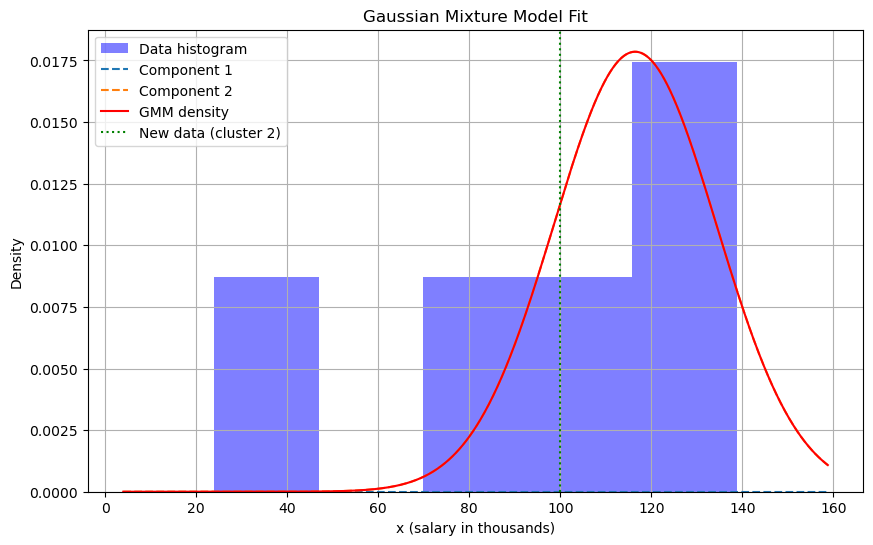


Summary of Results and Visualizations:
• Component 1: pi = 0.200, mu = 23.989, sigma = 0.001
• Component 2: pi = 0.800, mu = 116.441, sigma = 17.874
• New salary 100.0 assigned to cluster 2
• Plotted data histogram, GMM components, and total density


In [5]:
import math
import matplotlib.pyplot as plt
import random

# Set random seed for reproducibility
random.seed(42)

# --- Data from Table 8.2 (Annual Salary in thousands) ---
data = [
    (36, 89.563),   # Aditya
    (47, 123.543),  # Bob
    (26, 23.989),   # Chloé
    (68, 138.769),  # Daisuke
    (33, 113.888),  # Elisabeth
]

# Extract salaries (1D data)
x = [row[1] for row in data]

# --- Gaussian PDF ---
def gaussian_pdf(x, mu, sigma):
    """Compute the PDF of a Gaussian at x."""
    if sigma <= 0:
        return 0
    try:
        exponent = -((x - mu) ** 2) / (2 * sigma ** 2)
        return (1 / (math.sqrt(2 * math.pi) * sigma)) * math.exp(exponent)
    except (ValueError, OverflowError):
        return 0

# --- GMM EM Algorithm ---
def initialize_parameters(x, K):
    """Initialize GMM parameters: pi, mu, sigma."""
    n = len(x)
    # Initialize mixing coefficients uniformly
    pi = [1 / K for _ in range(K)]
    # Initialize means by randomly selecting K data points
    mu = random.sample(x, K)
    # Initialize variances (use sample variance for stability)
    var = sum((xi - sum(x) / n) ** 2 for xi in x) / n
    sigma = [math.sqrt(var) for _ in range(K)]
    return pi, mu, sigma

def e_step(x, pi, mu, sigma, K):
    """E-Step: Compute responsibilities p(z_n | x_n, theta)."""
    n = len(x)
    responsibilities = [[0 for _ in range(K)] for _ in range(n)]
    
    for i in range(n):
        # Compute denominator: p(x_i | theta) = sum_k pi_k * N(x_i | mu_k, sigma_k)
        denom = 0
        for k in range(K):
            denom += pi[k] * gaussian_pdf(x[i], mu[k], sigma[k])
        # Avoid division by zero
        if denom == 0:
            denom = 1e-10
        # Compute responsibilities
        for k in range(K):
            numer = pi[k] * gaussian_pdf(x[i], mu[k], sigma[k])
            responsibilities[i][k] = numer / denom
    
    return responsibilities

def m_step(x, responsibilities, K):
    """M-Step: Update parameters pi, mu, sigma."""
    n = len(x)
    # Compute N_k: effective number of points assigned to cluster k
    N_k = [0 for _ in range(K)]
    for k in range(K):
        N_k[k] = sum(responsibilities[i][k] for i in range(n))  # Fixed: Use 'responsibilities' instead of 'r'
    
    # Update pi_k
    pi = [N_k[k] / n if n > 0 else 1 / K for k in range(K)]
    
    # Update mu_k
    mu = [0 for _ in range(K)]
    for k in range(K):
        if N_k[k] > 0:
            mu[k] = sum(responsibilities[i][k] * x[i] for i in range(n)) / N_k[k]  # Fixed: Use 'responsibilities'
        else:
            mu[k] = random.choice(x)  # Reinitialize if no points assigned
    
    # Update sigma_k
    sigma = [0 for _ in range(K)]
    for k in range(K):
        if N_k[k] > 0:
            var = sum(responsibilities[i][k] * (x[i] - mu[k]) ** 2 for i in range(n)) / N_k[k]  # Fixed: Use 'responsibilities'
            sigma[k] = math.sqrt(max(var, 1e-6))  # Avoid zero variance
        else:
            sigma[k] = 1.0  # Default variance if no points assigned
    
    return pi, mu, sigma

def compute_log_likelihood(x, pi, mu, sigma, K):
    """Compute the log-likelihood of the data."""
    n = len(x)
    log_likelihood = 0
    for i in range(n):
        p_xi = 0
        for k in range(K):
            p_xi += pi[k] * gaussian_pdf(x[i], mu[k], sigma[k])
        if p_xi > 0:
            log_likelihood += math.log(p_xi)
        else:
            log_likelihood += math.log(1e-10)  # Avoid log(0)
    return log_likelihood

def fit_gmm(x, K, max_iters=100, tol=1e-4):
    """Fit a GMM using the EM algorithm."""
    # Initialize parameters
    pi, mu, sigma = initialize_parameters(x, K)
    
    # EM iterations
    prev_log_likelihood = float('-inf')
    for iter in range(max_iters):
        # E-Step
        responsibilities = e_step(x, pi, mu, sigma, K)
        
        # M-Step
        pi, mu, sigma = m_step(x, responsibilities, K)
        
        # Compute log-likelihood
        log_likelihood = compute_log_likelihood(x, pi, mu, sigma, K)
        
        # Check for convergence
        if abs(log_likelihood - prev_log_likelihood) < tol:
            print(f"Converged after {iter + 1} iterations")
            break
        prev_log_likelihood = log_likelihood
    
    return pi, mu, sigma, responsibilities

# --- Predict Cluster for New Data ---
def predict_cluster(x_new, pi, mu, sigma, K):
    """Predict the most likely cluster for a new data point."""
    probs = [pi[k] * gaussian_pdf(x_new, mu[k], sigma[k]) for k in range(K)]
    total = sum(probs)
    if total == 0:
        total = 1e-10
    probs = [p / total for p in probs]
    return probs.index(max(probs))

# --- Main Demonstration ---
def demonstrate_latent_variable_model():
    """Demonstrate a GMM with latent variables."""
    print("=== Latent-Variable Model Demonstration ===")
    print("Section 8.4.3: Latent-Variable Models\n")
    
    # Step 1: Fit GMM with K=2
    K = 2
    print(f"Fitting GMM with K={K} components")
    pi, mu, sigma, responsibilities = fit_gmm(x, K)
    
    # Print results
    print("\nLearned Parameters:")
    for k in range(K):
        print(f"Component {k+1}:")
        print(f"  Mixing coefficient (pi_{k+1}): {pi[k]:.3f}")
        print(f"  Mean (mu_{k+1}): {mu[k]:.3f}")
        print(f"  Standard deviation (sigma_{k+1}): {sigma[k]:.3f}")
    
    # Step 2: Show responsibilities
    print("\nResponsibilities (p(z_n | x_n, theta)):")
    for i, (xi, resp) in enumerate(zip(x, responsibilities)):
        print(f"Data point x_{i+1} = {xi:.3f}: {resp}")
    
    # Step 3: Predict cluster for a new salary
    x_new = 100.0
    cluster = predict_cluster(x_new, pi, mu, sigma, K)
    print(f"\nPrediction for new salary x_new = {x_new}:")
    print(f"Assigned to cluster {cluster + 1}")
    
    return pi, mu, sigma, x_new, cluster

# --- Plotting Function ---
def plot_gmm(x, pi, mu, sigma, K, x_new, cluster):
    """Plot the data histogram and GMM density."""
    plt.figure(figsize=(10, 6))
    
    # Plot histogram of data
    plt.hist(x, bins=5, density=True, alpha=0.5, color="blue", label="Data histogram")
    
    # Plot GMM density
    x_range = [min(x) - 20, max(x) + 20]
    x_vals = [x_range[0] + i * (x_range[1] - x_range[0]) / 1000 for i in range(1001)]
    y_vals = [0 for _ in x_vals]
    for k in range(K):
        component = [pi[k] * gaussian_pdf(xv, mu[k], sigma[k]) for xv in x_vals]
        plt.plot(x_vals, component, linestyle="--", label=f"Component {k+1}")
        for i in range(len(y_vals)):
            y_vals[i] += component[i]
    plt.plot(x_vals, y_vals, color="red", label="GMM density")
    
    # Mark new data point
    plt.axvline(x_new, color="green", linestyle=":", label=f"New data (cluster {cluster + 1})")
    
    plt.title("Gaussian Mixture Model Fit")
    plt.xlabel("x (salary in thousands)")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Main Execution ---
if __name__ == "__main__":
    print("Latent-Variable Model Demonstration with Matplotlib Plotting")
    print("=" * 60)

    # Demonstrate GMM
    pi, mu, sigma, x_new, cluster = demonstrate_latent_variable_model()

    # Plot the results
    print("\nPlotting Data Histogram and GMM Density")
    plot_gmm(x, pi, mu, sigma, 2, x_new, cluster)

    print("\n" + "=" * 60)
    print("Summary of Results and Visualizations:")
    for k in range(len(pi)):
        print(f"• Component {k+1}: pi = {pi[k]:.3f}, mu = {mu[k]:.3f}, sigma = {sigma[k]:.3f}")
    print(f"• New salary {x_new} assigned to cluster {cluster + 1}")
    print("• Plotted data histogram, GMM components, and total density")